In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm

In [4]:
pecan_data = pd.read_csv('data/Pecanstreet/participants_data/1min/661.csv', parse_dates=True).sort_values(by='localminute')
weather_data = pd.read_csv('data/Pecanstreet/weather_data/162.89.0.47.csv')

In [5]:
weather_data['date'] = pd.to_datetime(weather_data['date_time'])
weather_data['year'] = weather_data.date.dt.year
weather_data['month'] = weather_data.date.dt.month
weather_data['day'] = weather_data.date.dt.day
weather_data['hour_int'] = weather_data.date.dt.hour

In [6]:
del weather_data['date_time'], weather_data['moonrise'], weather_data['moonset'], weather_data['sunrise'], weather_data['sunset']
weather_data.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,...,tempC,visibility,winddirDegree,windspeedKmph,location,date,year,month,day,hour_int
0,1,-4,0.0,10.0,1,97,-9,-9,-2,-9,...,-2,10,9,25,162.89.0.47,2018-01-01 00:00:00,2018,1,1,0
1,1,-4,0.0,10.0,1,97,-10,-9,-2,-9,...,-2,10,12,25,162.89.0.47,2018-01-01 01:00:00,2018,1,1,1
2,1,-4,0.0,10.0,1,97,-11,-9,-3,-9,...,-3,10,14,26,162.89.0.47,2018-01-01 02:00:00,2018,1,1,2
3,1,-4,0.0,10.0,1,97,-13,-10,-3,-10,...,-3,10,17,26,162.89.0.47,2018-01-01 03:00:00,2018,1,1,3
4,1,-4,0.0,10.0,1,97,-13,-10,-3,-10,...,-3,10,15,25,162.89.0.47,2018-01-01 04:00:00,2018,1,1,4


In [7]:
desired_columns = list(zip(range(0, len(weather_data)), weather_data.columns.to_list()))
desired_columns

[(0, 'maxtempC'),
 (1, 'mintempC'),
 (2, 'totalSnow_cm'),
 (3, 'sunHour'),
 (4, 'uvIndex'),
 (5, 'moon_illumination'),
 (6, 'DewPointC'),
 (7, 'FeelsLikeC'),
 (8, 'HeatIndexC'),
 (9, 'WindChillC'),
 (10, 'WindGustKmph'),
 (11, 'cloudcover'),
 (12, 'humidity'),
 (13, 'precipMM'),
 (14, 'pressure'),
 (15, 'tempC'),
 (16, 'visibility'),
 (17, 'winddirDegree'),
 (18, 'windspeedKmph'),
 (19, 'location'),
 (20, 'date'),
 (21, 'year'),
 (22, 'month'),
 (23, 'day'),
 (24, 'hour_int')]

In [8]:
new_data = pecan_data.copy()
new_data['crop_date'] = pd.to_datetime(new_data['localminute'])

new_data['generation_solar1'] = np.where(new_data['solar'] < 0, 0, new_data['solar'])
new_data['generation_solar2'] = np.where(new_data['solar2'] < 0, 0, new_data['solar2'])
del new_data['dataid'], new_data['solar'], new_data['solar2'], new_data['leg1v'], new_data['leg2v']
data_columns = list(new_data.columns)

consumption = data_columns[1:len(data_columns) - 3]
new_data["sum_consumption"] = new_data[consumption].sum(axis=1)

generation = data_columns[len(data_columns) - 2:]
new_data["sum_generation"] = new_data[generation].sum(axis=1)
compiled = pd.DataFrame({'date': new_data['localminute'], 'consumption': new_data['sum_consumption'],
                         'generation': new_data['sum_generation'], 'crop_date': new_data['crop_date']})
compiled['consumption'] = np.where(compiled['consumption'] < 0, 0, compiled['consumption'])

In [9]:
compiled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
consumption,525530.0,1.965063,2.624462,0.0,0.218,0.735,2.634,19.666
generation,525530.0,0.878606,1.428030,0.0,0.000,0.001,1.204,5.943


In [10]:
df = compiled.copy()
df['date'] = pd.to_datetime(df.pop('crop_date'), format='%Y-%m-%d %H:%M:%S-%I:00') - pd.to_timedelta(6, unit='h')

In [11]:
df

,date,consumption,generation
441039,2018-01-01 00:00:00,0.691,0.0
441040,2018-01-01 00:01:00,0.689,0.0
441041,2018-01-01 00:02:00,0.688,0.0
441042,2018-01-01 00:03:00,0.688,0.0
441043,2018-01-01 00:04:00,0.687,0.0
...,...,...,...
440466,2018-12-31 00:55:00,1.754,0.0
440467,2018-12-31 00:56:00,1.737,0.0
440468,2018-12-31 00:57:00,1.736,0.0
440469,2018-12-31 00:58:00,1.757,0.0


In [12]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['hour'] = df.date.dt.hour
df['min'] = df.date.dt.minute
df['dayOfWeek'] = df.date.dt.day_of_week
df['dayOfYear'] = df.date.dt.day_of_year
df['hourOfDay'] = (df['min'] * 1) + 1
df.head(60).sum()

/var/folders/xc/dsxdmkl91rvg176425z821nm0000gn/T/ipykernel_83447/3443552609.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.head(60).sum()


consumption        30.294
generation          0.000
year           121080.000
month              60.000
day                60.000
hour                0.000
min              1770.000
dayOfWeek           0.000
dayOfYear          60.000
hourOfDay        1830.000
dtype: float64

In [13]:
def weather_find(year, month, day, hour):
    weather = weather_data[(weather_data['year'] == row.year) & 
                     (weather_data['month'] == row.month) & 
                     (weather_data['day'] == row.day) & 
                     (weather_data['hour_int'] ==row.hour)].to_dict('records')[0]
    
    for col in ['location', 'date','day','hour_int']:
        del weather[col]
    return weather

In [14]:
rows = []
hour_consumption = 0
hour_generation = 0
for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    hour_consumption += row.consumption
    hour_generation += row.generation
    if row.hourOfDay % 60 == 0:
        weather = weather_find(row.year, row.month, row.day, row.hour)
        consu = {
            'year': row.year, 
            'month': row.month, 
            'day': row.day, 
            'hour':row.hour + 1,
            'consumption': hour_consumption/60,
            'generation': hour_generation/60,
            'dayOfWeek': row.dayOfWeek,
            'dayOfYear': row.dayOfYear

        }
        consu.update(weather)
        rows.append(consu)
        hour_consumption = 0
        hour_generation = 0
        

100%|████████████████████████████████| 525530/525530 [00:25<00:00, 20340.27it/s]


In [15]:
data = pd.DataFrame(rows)

In [16]:
data['prev_consumption'] = data.shift(1)['consumption']
data['consumption_change'] = data.apply(
    lambda row: 0 if np.isnan(row.prev_consumption) else row.consumption - row.prev_consumption, axis=1
)
data = data.fillna(0)

In [18]:
data.tail()

,year,month,day,hour,consumption,generation,dayOfWeek,dayOfYear,maxtempC,mintempC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,prev_consumption,consumption_change
8754,2018,12,31,1,2.156367,0.0,0,365,17,5,...,100,94,1.6,1011,6,7,248,9,3.380133,-1.223767
8755,2018,12,31,1,1.913050,0.0,0,365,17,5,...,100,94,1.6,1011,6,7,248,9,2.156367,-0.243317
8756,2018,12,31,1,1.639217,0.0,0,365,17,5,...,100,94,1.6,1011,6,7,248,9,1.913050,-0.273833
8757,2018,12,31,1,1.982983,0.0,0,365,17,5,...,100,94,1.6,1011,6,7,248,9,1.639217,0.343767
8758,2018,12,31,1,1.814567,0.0,0,365,17,5,...,100,94,1.6,1011,6,7,248,9,1.982983,-0.168417


<AxesSubplot:>

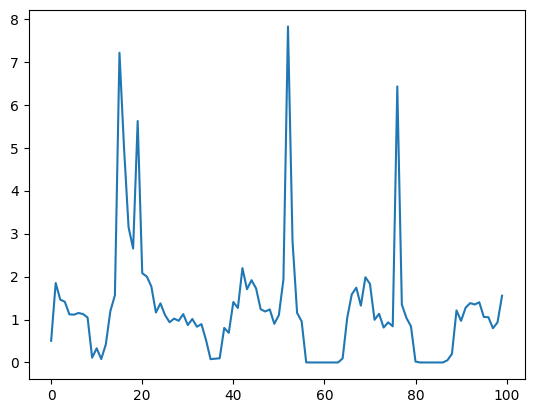

In [19]:
data.consumption[:100].plot()

In [20]:
data.consumption.describe().transpose()

count    8759.000000
mean        1.965026
std         2.185450
min         0.000000
25%         0.506750
50%         1.059900
75%         2.821183
max        12.752433
Name: consumption, dtype: float64

In [21]:
data.to_csv('data/Pecanstreet/participants_data/1hour/features/all/661_all_features.csv', index=False)